In [34]:
# Import basic Libreries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [35]:
# Load csv dataset
boston_dataset = pd.read_csv('boston.csv')
boston_dataset.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [36]:
# Descriptive analysis

boston_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [37]:
boston_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [38]:
# Checking Number of outliers in the Boston dataset

boston_dataset.isnull().sum().any()

False

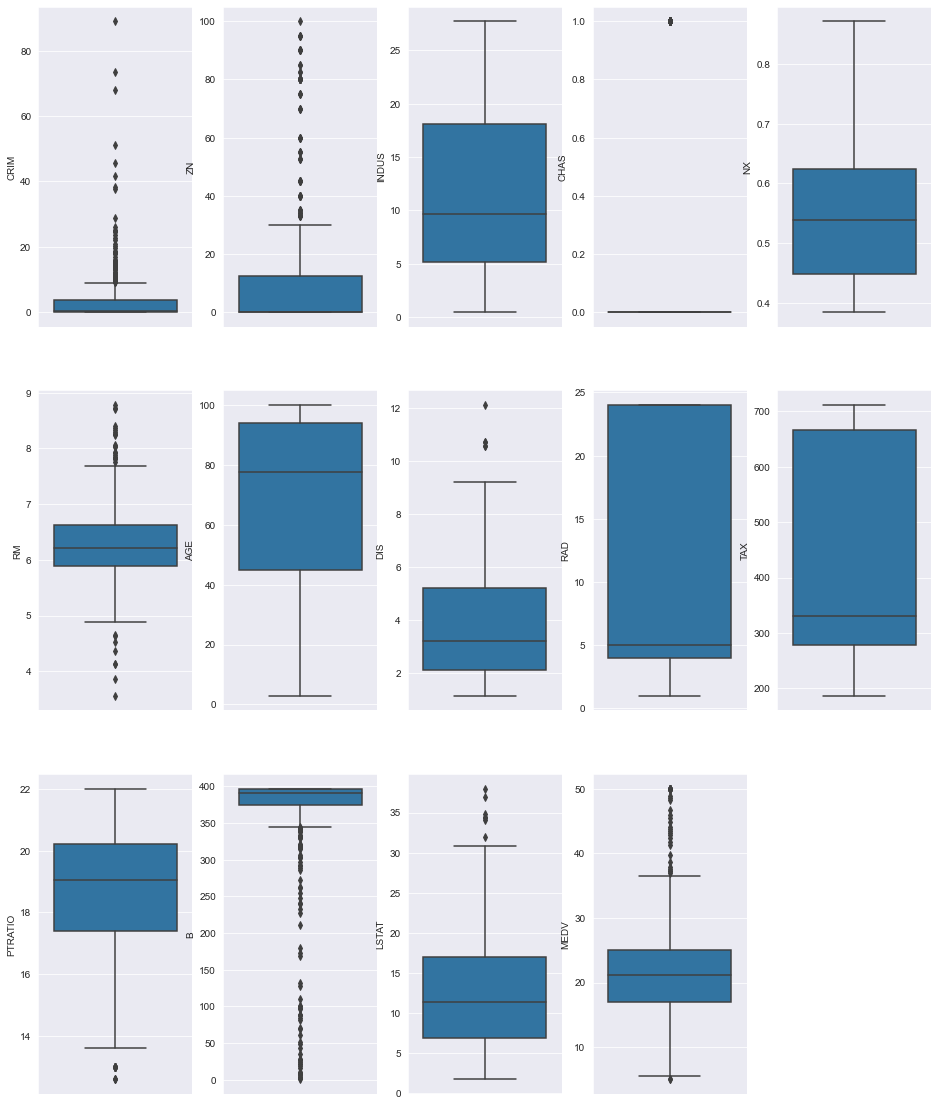

In [39]:
# Drawing univariet Insights

plt.figure(figsize=(16,20))
for i in enumerate(boston_dataset.columns):
    plt.subplot(3,5,i[0]+1)
    sns.boxplot(y=i[1],data=boston_dataset)


In [40]:
# From THe plot we can conclude that 
# CRIM, ZN, RM, B have significant outliersplt.
# BUt how much? 

for k, v in boston_dataset.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(boston_dataset)[0]
        print('%s column outliers %.2f%%'%(k,perc))
      #   boston_dataset = v[~((v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq))]
      

# '''Outliers are present at --> CRIM, ZN, CHAS, B, MEDV
#    'CHAS' have descrete dummy variable'''


CRIM column outliers 13.04%
ZN column outliers 13.44%
INDUS column outliers 0.00%
CHAS column outliers 100.00%
NX column outliers 0.00%
RM column outliers 5.93%
AGE column outliers 0.00%
DIS column outliers 0.99%
RAD column outliers 0.00%
TAX column outliers 0.00%
PTRATIO column outliers 2.96%
B column outliers 15.22%
LSTAT column outliers 1.38%
MEDV column outliers 7.91%


In [41]:
# Let's remove MEDV outliers (MEDV = 50.0) before plotting more distributions

boston_dataset = boston_dataset[~(boston_dataset['MEDV'] >= 50.0)]
np.shape(boston_dataset)

(490, 14)

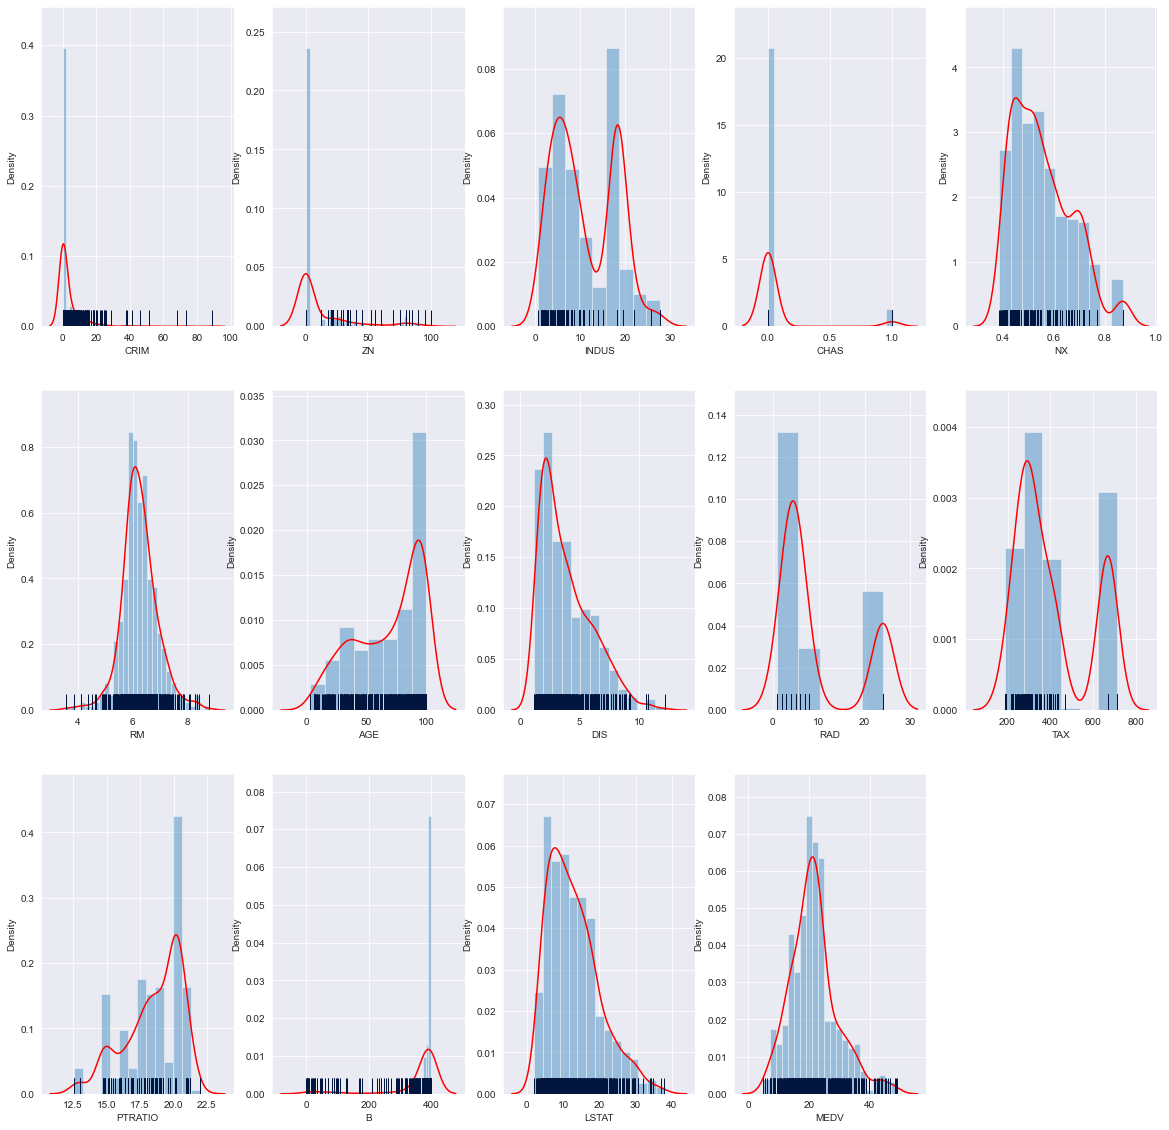

In [42]:
# Distribution plot

sns.set_style("darkgrid")
plt.figure(figsize=(20,20))
for d in enumerate(boston_dataset):
    plt.subplot(3,5,d[0]+1)
    sns.distplot(boston_dataset[d[1]],kde=True,rug=True,
                rug_kws={'height':0.05, 'color': 'xkcd:navy'},kde_kws={'color':'r'})

The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. 

Also MEDV looks to have a normal distribution (the predictions) and 

other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).

<AxesSubplot:>

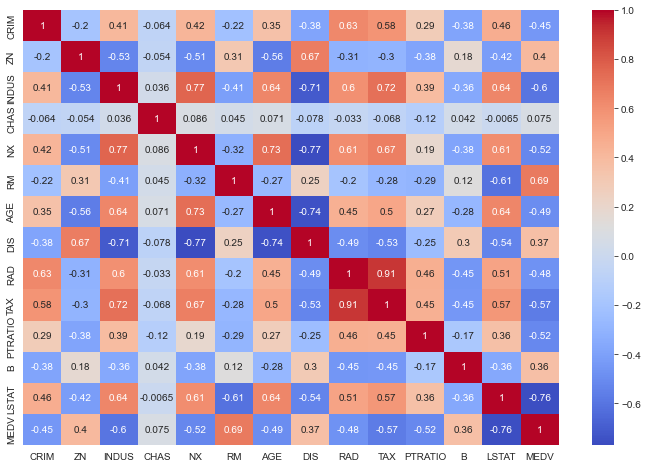

In [43]:
# Bivariet analysis using corelation

plt.figure(figsize=(12,8))
sns.heatmap(boston_dataset.corr(),annot=True,cmap='coolwarm')

In [44]:
# Need to check multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['feature'] = boston_dataset.columns
vif['vIF value'] = [variance_inflation_factor(boston_dataset,i) for i in range(boston_dataset.shape[1])]
vif

,feature,vIF value
0,CRIM,2.146727
1,ZN,2.891551
2,INDUS,14.623065
3,CHAS,1.129783
4,NX,73.524623
5,RM,170.449093
6,AGE,21.602705
7,DIS,15.789882
8,RAD,15.012409
9,TAX,61.651039


In [45]:
x=boston_dataset.drop(['CRIM','ZN','RAD','B','CHAS','MEDV'],axis=1)
y=boston_dataset.iloc[:,-1:]

From correlation matrix, we see TAX and RAD are highly correlated features. 

The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 

with MEDV which is a good indication of using as predictors.



In [46]:
x.columns

Index(['INDUS', 'NX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

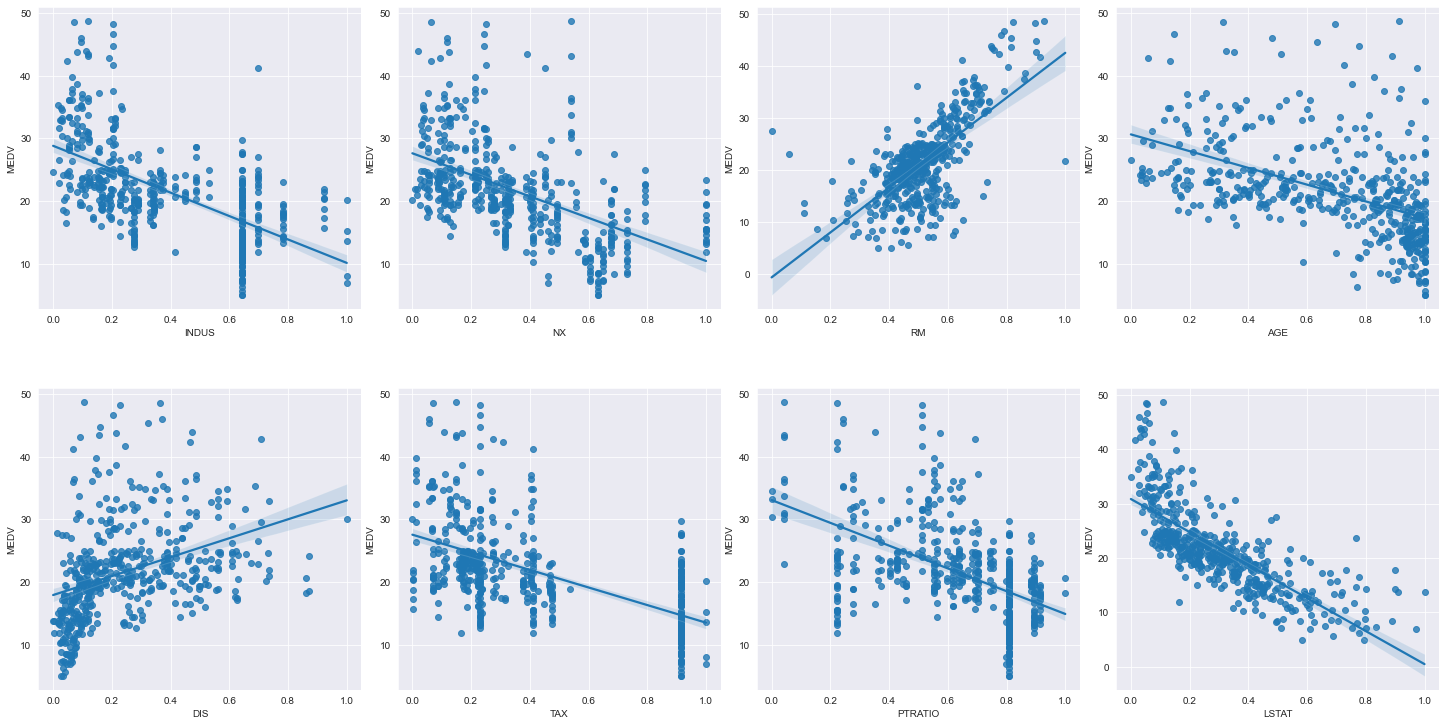

In [47]:
# Plotting these columns against MEDV

from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV

min_max_scaler = preprocessing.MinMaxScaler()
x = boston_dataset.loc[:,x.columns]
y = boston_dataset['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=x.columns)

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for i, k in enumerate(x.columns):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [48]:
# Try to remove the skewness of the data trough log transformation.
# log(1+x)=log1p(x)

y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [49]:
# Split the train and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=123,test_size=0.25)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(367, 8) (123, 8) (367,) (123,)


In [50]:
# Linear Regression model building 

from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(xtrain,ytrain)

LinearRegression()

In [51]:
# model prediction
ypred = l_reg.predict(xtest)

In [52]:
# model Score
l_reg.score(xtrain,ytrain)

0.753268389962506

In [53]:
# Checking R2 score
from sklearn import metrics
rsq =metrics.r2_score(ytest,ypred)
rsq

0.7708086412043885

In [54]:
# # MSE and MAPE error

print('MSE',metrics.mean_squared_error(ytest,ypred))
print('MAPE', metrics.mean_absolute_percentage_error(ytest,ypred)*100)

MSE 0.02459545223768744
MAPE 3.922218941257939


In [55]:
from sklearn import linear_model

und_ridge = linear_model.RidgeCV(cv=10)
und_ridge.fit(xtrain,ytrain)
und_ridge.score(xtest,ytest)

0.769835448600358

In [56]:
from sklearn import linear_model 
ove = linear_model.LassoCV(max_iter=1000)
ove.fit(xtrain,ytrain)
ove.score(xtest,ytest)

0.770930678083965

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

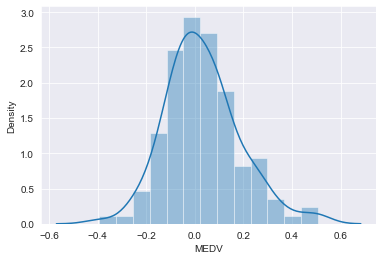

In [57]:
sns.distplot(ytest-ypred)

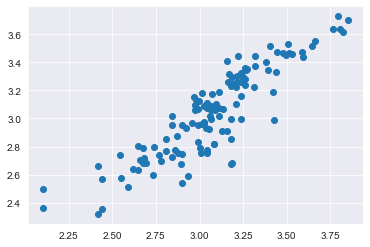

In [58]:
plt.scatter(ytest,ypred)